In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=66)

In [5]:
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [6]:
forest.score(X_train, y_train)

1.0

In [7]:
forest.score(X_test, y_test)

0.951048951048951

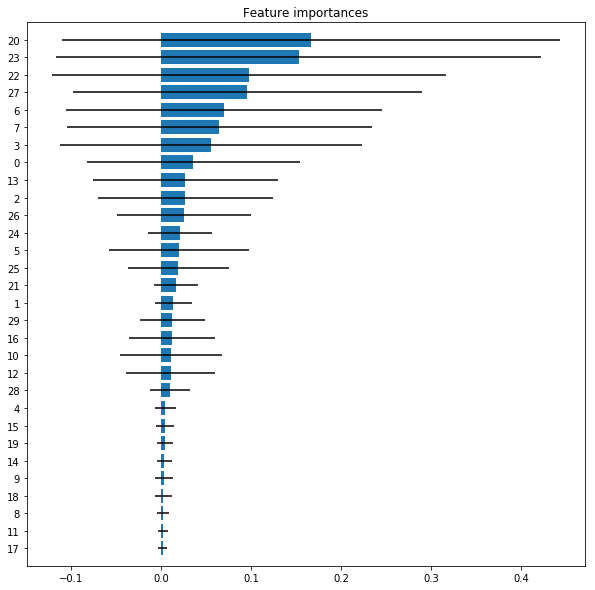

In [25]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices], xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()